# Lab Assignment 4: Relay Control

In this lab assignment you will implement relay control for the Temperature Control Laboratory.

1. Implement and test a relay control for the heater/sensor system
2. Implement and test a relay control to track a complex setpoint.

## Exercise 1. Relay (or On-Off) control


Create a notebook to implements a relay control for the Temperature Control Lab subject the following requirements:

* Simultaneous control of sensor temperatures T1 and T2 to setpoints 35 and 40 degrees, respectively. The setpoints return to 25 deg C at  t = 300.
* Use a tolerance value $d$ of 0.5 deg C.
* Set the minimum and maximum values of the heater to 0 and 100%, respectively. lab.P1 and lab.P2 should be left at their default values.
* Show the results of an experiment in which the setpoints are adjusted as 

Some started code is include below.

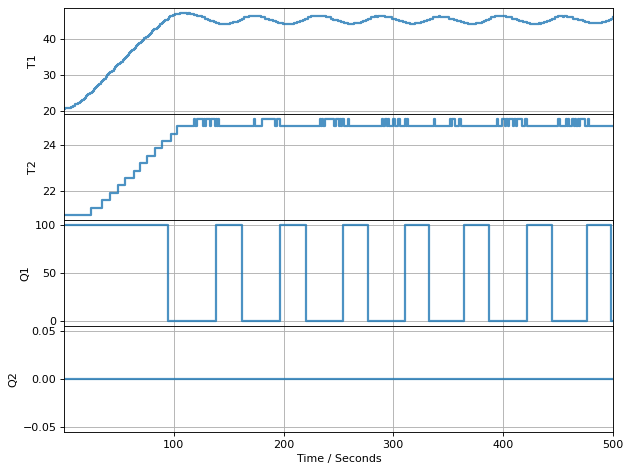

TCLab Model disconnected successfully.


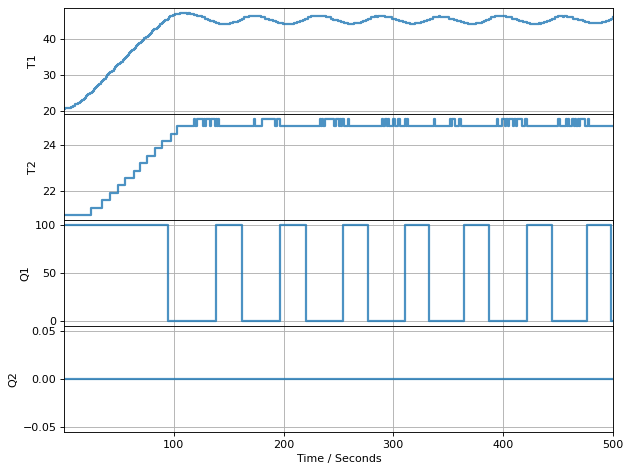

In [4]:
from tclab import TCLab, clock, Historian, Plotter, setup

TCLab = setup(connected=False)

# modify these setpoints to change with time
SP1 = 40
SP2 = 35

# relay controller
def relay(SP, d=1, Umin=0, Umax=100):
    U = 0
    while True:
        T = yield U
        if T < SP - d/2:
            U = Umax
        if T > SP + d/2:
            U = Umin

# create a single control loop
controller1 = relay(SP1)
controller1.send(None)

t_final = 500
t_step = 1
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, t_final)
    for t in clock(t_final, t_step):
        T1 = lab.T1
        U1 = controller1.send(T1)
        lab.Q1(U1)
        p.update()

## Procedures

1. Begin by testing the above code on your laptop.
2. Create a new cell, copy the code to the new cell, and extend the code to control both T1 and T2 to the desired setpoints.
3. Create another new cell, modify the setpoint function to include the switch to 25 degrees at t=300. Test this cell on your real hardware.
4. Create one more new cell, and use class notes on setpoints to track this function on T1 while maintain T2 at a constant 40 deg C.

![](https://d29hmqxeker05q.cloudfront.net/eyJidWNrZXQiOiJpbWFnZXMuY2tiay5jb20iLCJrZXkiOiJpbWFnZXMvY2hvYzI0NDE0YzA0czAwMXNzMDAxc3NzMDA0ZzAxLmpwZyIsImVkaXRzIjp7InJlc2l6ZSI6eyJ3aXRob3V0RW5sYXJnZW1lbnQiOnRydWUsIndpZHRoIjo2NTEsImhlaWdodCI6NTAwLCJmaXQiOiJpbnNpZGUifSwianBlZyI6eyJxdWFsaXR5Ijo5MCwicHJvZ3Jlc3NpdmUiOnRydWV9fX0=)